## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

Here is your task:

Download a small (5-15) set of variables of interest.
Write a short description of the data you chose, and why. (1 page)
Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
Produce some numeric summaries and visualizations. (1-3 pages)
Describe your findings in 1-2 pages.
If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:

#
var_list = ['year','educ','age','sex','agekdbrn','wrkstat','hrs1','indus10',
            'prestg10','prestg105plus','marital','martype','cowrksta','sppres10',
            'earnrs','income','income16'] # List of variables you want to save

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [42]:
new_df = pd.read_csv('selected_gss_data.csv')

<ipython-input-42-81782028bffc>:1: DtypeWarning: Columns (11,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('selected_gss_data.csv')


In [43]:
new_df.head(5)

,year,educ,age,sex,agekdbrn,wrkstat,hrs1,indus10,prestg10,prestg105plus,marital,martype,cowrksta,sppres10,earnrs,income,income16
0,1972,16.0,23.0,female,NaN,working full time,NaN,5170.0,45.0,49.0,never married,NaN,NaN,NaN,1.0,NaN,NaN
1,1972,10.0,70.0,male,NaN,retired,NaN,6470.0,50.0,62.0,married,NaN,NaN,NaN,0.0,NaN,NaN
2,1972,12.0,48.0,female,NaN,working part time,NaN,7070.0,49.0,69.0,married,NaN,NaN,41.0,2.0,NaN,NaN
3,1972,17.0,27.0,female,NaN,working full time,NaN,5170.0,60.0,85.0,married,NaN,NaN,39.0,2.0,NaN,NaN
4,1972,12.0,61.0,female,NaN,keeping house,NaN,6680.0,31.0,21.0,married,NaN,NaN,38.0,1.0,NaN,NaN


I started with 17 variables and ended up keeping 13
:
Here are the descriptions copied from the codebook:

EDUC RESPONDENT'S education

AGE RESPONDENT'S age

SEX CODE RESPONDENT'S SEX

AGEKDBRN How old were you when your first child was born?

WRKSTAT Last week were you working full time, part time, going to school, keeping house, or what?

HRS1 - IF WORKING, FULL OR PART TIME: How many hours did you work last week, at all jobs?

PRESTG10 PRESTIGE OF RESPONDENT'S OCCUPATION

MARITAL Are you currently married, widowed, divorced, separated, or have you never been married?

COWRKSTA Last week was your partner working full time, part time, going to school, keeping house, or what?

SPPRES10 PRESTIGE OF RESPONDENT'S SPOUSE'S OCCUPATION

EARNRS  Just thinking about your family now--those people in the household who are related to you . . . How many persons in the family (including yourself) earned any money in [the last year] from any job or employment?

YEAR - the year the observation was recorded

INCOME16 In which of these groups did your total family income, from all sources, fall last year? That is, before taxes.

I chose this set of variables because I am mainly interested in the historical changes in female labor force participation over time. How does the prestige of a wife's job compare to that of her husband's? In 1980 vs. in 2010? If a woman has her first child at a younger age, is she less likely to work full-time? Similarly, is there more likely to be one household earner in the past and/or if the woman had children younger? The gender wage gap has narrowed over time and gender roles are changing, but we still see a difference in the "prestige" and pay of male-dominated and female-dominated occupations and industries.  Overall, I am interested to see what patterns emerge in labor force participation for men and women over time and with families.

CLEANING THE DATA

I did not include this code to save space, but I described each variable to make sure there were enough non-missing values

Indus10 does not give the information I wanted

Do not need two measures of prestige - dropping prestg105plus

Marital is enough information - dropping martype

Income only goes up to 25000 and income16 seems to be better to use here

In [44]:
new_df.drop(columns=['indus10','prestg105plus','martype','income'], inplace=True)

In [45]:
# renaming variables for clarity
new_df.rename(columns={'agekdbrn':'age_kid_born','hrs1':'hours_worked','prestg10':'occ_prestige',
                       'cowrksta':'spouse_work_status','sppres10':'spouse_prestige','income16':'income'}, inplace=True)

In [46]:
new_df.head()

,year,educ,age,sex,age_kid_born,wrkstat,hours_worked,occ_prestige,marital,spouse_work_status,spouse_prestige,earnrs,income
0,1972,16.0,23.0,female,NaN,working full time,NaN,45.0,never married,NaN,NaN,1.0,NaN
1,1972,10.0,70.0,male,NaN,retired,NaN,50.0,married,NaN,NaN,0.0,NaN
2,1972,12.0,48.0,female,NaN,working part time,NaN,49.0,married,NaN,41.0,2.0,NaN
3,1972,17.0,27.0,female,NaN,working full time,NaN,60.0,married,NaN,39.0,2.0,NaN
4,1972,12.0,61.0,female,NaN,keeping house,NaN,31.0,married,NaN,38.0,1.0,NaN


In [47]:
new_df['income'].value_counts()
# Income might be a more useful variable if it is numeric

,count
income,
"$60,000 to $74,999",1144
"$170,000 or over",1037
"$75,000 to $89,999",935
"$90,000 to $109,999",899
"$50,000 to $59,999",886
"$40,000 to $49,999",854
"$110,000 to $129,999",630
"$30,000 to $34,999",564
"$35,000 to $39,999",515


In [48]:
new_df['income_numeric'] = (
    new_df['income']
    .dropna()  # Remove NaN before processing
    .str.extract(r'(\d[\d,]*)')[0]  # Extract first number
    .str.replace(',', '', regex=True)  # Remove commas
    .astype(float)  # Convert to numeric type
)
# Chat GPT helped me with the code to extract the first number - to make income a numeric variable to get more information
new_df['income_numeric'].describe()

,income_numeric
count,11367.000000
mean,64967.185713
std,49615.518272
min,1000.000000
25%,25000.000000
50%,50000.000000
75%,90000.000000
max,170000.000000


Analysis

In [49]:
new_df['occ_prestige'].groupby(new_df['sex']).describe()
# on average, the occupation prestige of men is slighter higher than women - both mean and median, and at 25% and 75% quartiles

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,36530.0,42.737859,12.902407,16.0,32.0,42.0,50.0,80.0
male,30624.0,43.952717,13.262722,16.0,35.0,43.0,51.0,80.0


In [50]:
new_df['educ'].groupby(new_df['sex']).describe()
# on average, men achieve higher levels of education than women

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,40179.0,12.938450,3.059162,0.0,12.0,12.0,15.0,20.0
male,31885.0,13.156124,3.324864,0.0,12.0,13.0,16.0,20.0


Here, I wanted to break up the data into time chunks to compare trends before 1990, after 1990, and after 2010. Gender norms around work have changed, so this can offer valuable insight.

In [51]:
# breaking up data into time chunks
df_before_1990 = new_df[new_df['year'] < 1990]
df_1990_2010 = new_df[(new_df['year'] >= 1990) & (new_df['year'] <= 2010)]
df_after_2010 = new_df[new_df['year'] >= 2010]

# exploring education differences between genders over time
print("Before 1990, Education by Gender",'\n')
print(df_before_1990['educ'].groupby(df_before_1990['sex']).describe(),'\n')
print("Between 1990 and 2010, Education by Gender",'\n')
print(df_1990_2010['educ'].groupby(df_1990_2010['sex']).describe(),'\n')
print("After 2010, Education by Gender",'\n')
print(df_after_2010['educ'].groupby(df_after_2010['sex']).describe())

Before 1990, Education by Gender 

          count       mean       std  min   25%   50%   75%   max
sex                                                              
female  13880.0  11.888833  2.976182  0.0  11.0  12.0  13.0  20.0
male    10936.0  12.234455  3.517711  0.0  11.0  12.0  14.0  20.0 

Between 1990 and 2010, Education by Gender 

          count       mean       std  min   25%   50%   75%   max
sex                                                              
female  16851.0  13.203786  2.912759  0.0  12.0  13.0  15.0  20.0
male    13258.0  13.399759  3.155655  0.0  12.0  13.0  16.0  20.0 

After 2010, Education by Gender 

          count       mean       std  min   25%   50%   75%   max
sex                                                              
female  10598.0  13.949236  2.977103  0.0  12.0  14.0  16.0  20.0
male     8580.0  13.984382  3.028325  0.0  12.0  14.0  16.0  20.0


Before 1990, average education was lower for women than men. After 1990, we see the gap closing and getting even narrower after 2010.
The plot below also the narrowing of the gender education gap over time

[Text(0.5, 1.0, 'Average Education Level Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Education Level')]

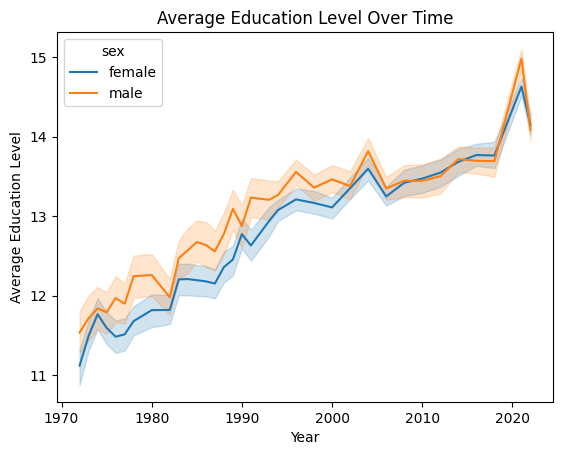

In [52]:
import seaborn as sns # Import Seaborn
avg_education_per_year = new_df.groupby(['year','sex'])['educ'].mean().reset_index()

fig = sns.lineplot(data = new_df, x = 'year', y = 'educ', hue = 'sex')
fig.set(title="Average Education Level Over Time",
        xlabel='Year', ylabel='Average Education Level')

Next, I wanted to look into gender differences in the type of work: keeping house, working-part time, and working full time.
I compare the data from before 1990 and after 2010

In [53]:
pd.crosstab(df_before_1990['sex'], df_before_1990['wrkstat'])
# before 1990, the gender roles are very stark - more women keeping house, fewer women working full time, and more women working part-time

wrkstat,in school,keeping house,other,retired,"unemployed, laid off, looking for work","with a job, but not at work because of temporary illness, vacation, strike",working full time,working part time
sex,,,,,,,,
female,374,5522,172,1088,206,257,4672,1635
male,353,105,179,1782,571,295,6941,741


In [54]:
pd.crosstab(df_after_2010['sex'], df_after_2010['wrkstat'])
# after 2010, there are still similar trends, but the gaps are closing more
# women have almost caught up to men in working full time
# although women are still much more likely to be keeping house or working part-time than men

wrkstat,in school,keeping house,other,retired,"unemployed, laid off, looking for work","with a job, but not at work because of temporary illness, vacation, strike",working full time,working part time
sex,,,,,,,,
female,331,1563,362,2036,485,260,4254,1320
male,265,247,265,1865,504,152,4590,711


Next, I wanted to explore the impact of having children on female career outcomes. By dividing the dataset by gender and by age of first child born, we can explore the effects of young motherhood on career outcomes and income.

In [55]:
female_df = new_df[new_df['sex'] == "female"]
male_df = new_df[new_df['sex'] == "male"]

first_kid_under_25_f = female_df[female_df['age_kid_born'] < 25]
first_kid_over_25_f = female_df[female_df['age_kid_born'] >= 25]

print(first_kid_under_25_f['income_numeric'].groupby(first_kid_under_25_f['sex']).describe())
print(first_kid_over_25_f['income_numeric'].groupby(first_kid_over_25_f['sex']).describe())
# when a woman has her first child under the age of 25, her family income tends to be lower on average
# at the mean, the difference is 81,878 to 46,172 and at the median, the difference is 75,000 to 35,000

         count          mean           std     min      25%      50%      75%  \
sex                                                                             
female  2808.0  46172.720798  39362.974916  1000.0  17500.0  35000.0  60000.0   

             max  
sex               
female  170000.0  
         count          mean           std     min      25%      50%  \
sex                                                                    
female  1803.0  81878.258458  52905.571166  1000.0  40000.0  75000.0   

             75%       max  
sex                         
female  130000.0  170000.0  


In [56]:
# create a dataset splitting up all people by age they had their first child to compare genders
first_kid_under_25 = new_df[new_df['age_kid_born'] < 25]
first_kid_over_25 = new_df[new_df['age_kid_born'] >= 25]

<ipython-input-57-2074f28d150b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_kid_under_25.loc[:, 'group'] = 'Under 25'
<ipython-input-57-2074f28d150b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_kid_over_25.loc[:, 'group'] = '25 and Over'


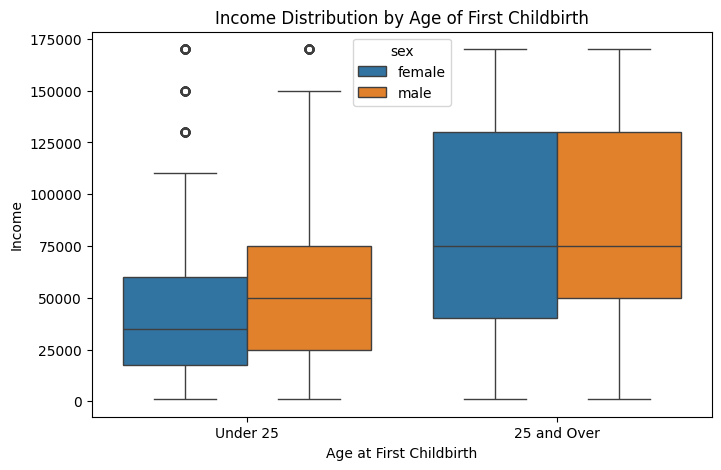

In [57]:
first_kid_under_25.loc[:, 'group'] = 'Under 25'
first_kid_over_25.loc[:, 'group'] = '25 and Over'

# Combine both into a single DataFrame for plotting
boxplot_df = pd.concat([first_kid_under_25, first_kid_over_25])

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=boxplot_df, x='group', y='income_numeric',hue='sex')

# Customize labels
plt.title("Income Distribution by Age of First Childbirth")
plt.xlabel("Age at First Childbirth")
plt.ylabel("Income")

# Show plot
plt.show()

# both men and women achieve higher family income when they delay childrearing
# however, women experience a higher income penalty than men when they have children before age 25

Next, I wanted to explore the impact of marriage status on male and female career outcomes. I coded married women as married and all others as "single".

In [58]:
married_women = female_df[female_df['marital'] == "married"]
single_women = female_df[female_df['marital'] != "married"] # all else count as "single"
print("Married Women")
print(married_women['income_numeric'].groupby(married_women['sex']).describe())
print("Single Women")
print(single_women['income_numeric'].groupby(single_women['sex']).describe())
# married women have higher family incomes on average compared to single women
# the difference at the mean is 84,439 to 43,219
# however, unmarried women tend to be younger and thus not at their
# peak-earnings point in their career yet

Married Women
         count          mean           std     min      25%      50%  \
sex                                                                    
female  2564.0  84439.547582  49609.545015  1000.0  50000.0  75000.0   

             75%       max  
sex                         
female  130000.0  170000.0  
Single Women
         count          mean           std     min      25%      50%      75%  \
sex                                                                             
female  3603.0  43219.678046  38833.216514  1000.0  15000.0  30000.0  60000.0   

             max  
sex               
female  170000.0  


In [59]:
# adjust the data to compare unmarried and married women at a similar age (40-55)
married_women_older = female_df[(female_df['marital'] == "married")&(female_df['age'] >= 40)&(female_df['age'] <= 55)]
single_women_older = female_df[(female_df['marital'] != "married") &(female_df['age'] >= 40)&(female_df['age'] <= 55)]
# women who are single and married ages 40-55 (peak earnings time)

print("Married Women")
print(married_women_older['income_numeric'].groupby(married_women_older['sex']).describe())
print("Single Women")
print(single_women_older['income_numeric'].groupby(single_women_older['sex']).describe())

Married Women
        count         mean           std     min      25%      50%       75%  \
sex                                                                            
female  785.0  96383.43949  51277.942665  1000.0  60000.0  90000.0  150000.0   

             max  
sex               
female  170000.0  
Single Women
        count          mean           std     min      25%      50%      75%  \
sex                                                                            
female  791.0  46911.504425  40214.382862  1000.0  15000.0  40000.0  60000.0   

             max  
sex               
female  170000.0  


Interestingly, there is still a large gap in family income between women who are married and not married at ages 40-55. This is likely because the income variable we are using is pooled family income.
For the next analysis, we will also use the age bounds to eliminate young women who are not yet married.

In [60]:
print("Married Women")
print(married_women_older['hours_worked'].groupby(married_women_older['sex']).describe())
print("Single Women")
print(single_women_older['hours_worked'].groupby(single_women_older['sex']).describe())
# married women work fewer hours on average than single women

Married Women
         count       mean        std  min   25%   50%   75%   max
sex                                                              
female  3864.0  38.027692  13.556566  1.0  32.0  40.0  42.0  89.0
Single Women
         count      mean        std  min   25%   50%   75%   max
sex                                                             
female  3037.0  41.14916  12.251017  1.0  38.0  40.0  45.0  89.0


40 hour work weeks are the most common and standard. However, the average hours worked by single women are above 40. For married women, the average falls below 40. Therefore, of women who are working, married women are much more likely to work part-time or fewer hours on average.

Now looking at the difference of hours worked over time between genders.

[Text(0.5, 1.0, 'Average Hours Worked Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Hours Worked Level')]

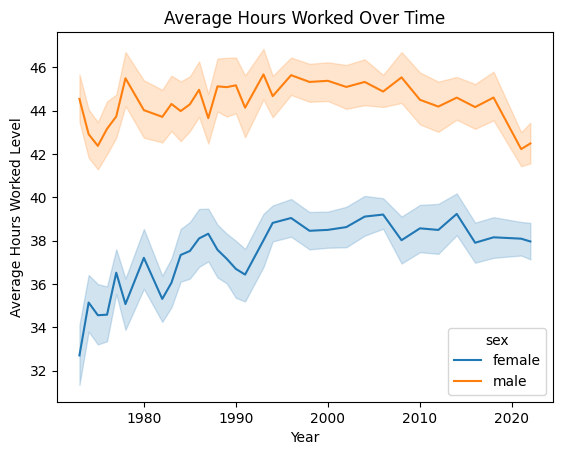

In [61]:
avg_hours_per_year = new_df.groupby(['year','sex'])['hours_worked'].mean().reset_index()

fig = sns.lineplot(data = new_df, x = 'year', y = 'hours_worked', hue = 'sex')
fig.set(title="Average Hours Worked Over Time",
        xlabel='Year', ylabel='Average Hours Worked Level')

In [62]:
print("Married Women")
print(married_women_older['occ_prestige'].groupby(married_women_older['sex']).describe())
print("Single Women")
print(single_women_older['occ_prestige'].groupby(single_women_older['sex']).describe())
# married women have occupations with higher prestige on average than single women

Married Women
         count       mean       std   min   25%   50%   75%   max
sex                                                              
female  5782.0  44.410758  12.98272  16.0  35.0  45.0  53.0  80.0
Single Women
         count      mean        std   min   25%   50%   75%   max
sex                                                              
female  4198.0  42.78728  12.985018  16.0  32.0  43.0  50.0  80.0


For men, I now split up the data by marriage status and focus only on men aged 40-55 - peak earning years - and to eliminate young men who may plan to get married in the future.

In [63]:

married_men_older = male_df[(male_df['marital'] == "married")&(male_df['age'] >= 40)&(male_df['age'] <= 55)]
single_men_older = male_df[(male_df['marital'] != "married")&(male_df['age'] >= 40)&(male_df['age'] <= 55)]
print("Married Men")
print(married_men_older['hours_worked'].groupby(married_men_older['sex']).describe())
print("Single Men")
print(single_men_older['hours_worked'].groupby(single_men_older['sex']).describe())
# married men work more hours on average than single men
# the difference at the median is 5 hours
# this trend is the opposite for women
# these findings align with cultural and societal ideas that men become the provider in a marriage and women retreat from the labor force

Married Men
       count       mean        std  min   25%   50%   75%   max
sex                                                            
male  4819.0  47.161029  12.795134  0.0  40.0  45.0  53.0  89.0
Single Men
       count       mean        std  min   25%   50%   75%   max
sex                                                            
male  2384.0  45.282299  14.245362  0.0  40.0  40.0  50.0  89.0


In [64]:
print("Married Men")
print(married_men_older['occ_prestige'].groupby(married_men_older['sex']).describe())
print("Single Men")
print(single_men_older['occ_prestige'].groupby(single_men_older['sex']).describe())
# married men have higher occupation prestige than single men on average
# this is consistent with societal providership norms

Married Men
       count   mean        std   min   25%   50%   75%   max
sex                                                         
male  5575.0  46.12  13.186517  16.0  35.0  45.0  53.0  80.0
Single Men
       count       mean        std   min   25%   50%   75%   max
sex                                                             
male  3129.0  42.561841  12.715034  16.0  35.0  40.0  50.0  80.0


[Text(0.5, 1.0, 'Grouped KDE Plot')]

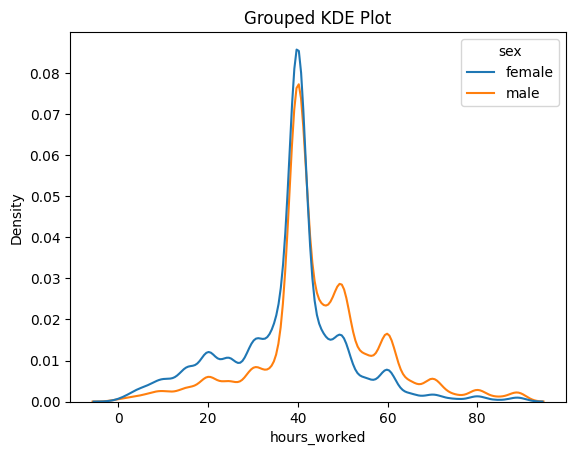

In [65]:
conditioning = 'sex'
var = 'hours_worked'
sns.kdeplot( data=new_df, x=var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot')
# women are more likely to work part-time (the 20-hour mark) and men are more likely to work more than 40 hours per week

I was curious how the age of childrearing affects male and female labor force participation.

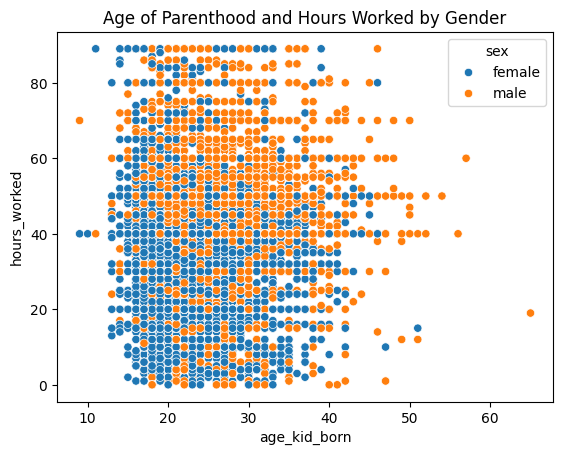

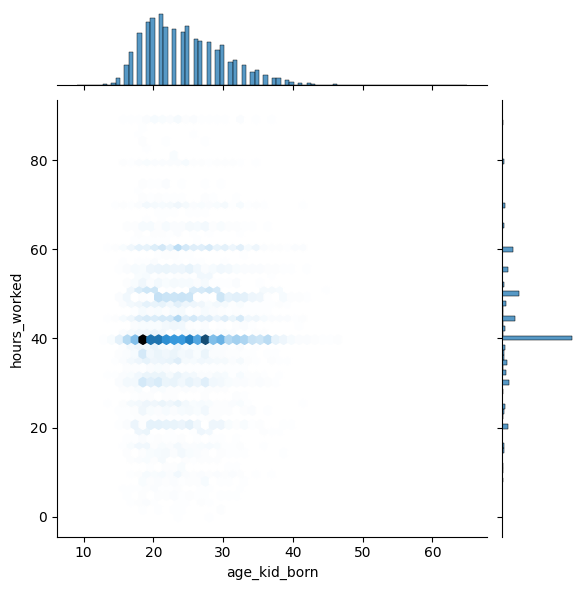

In [66]:
var1 = 'age_kid_born' # A numeric variable
var2 = 'hours_worked' # Another numeric
cat1 = 'sex' # A categorical variable

sns.scatterplot(data=new_df, x=var1, y=var2, hue=cat1).set(title='Age of Parenthood and Hours Worked by Gender')
plt.show() # Our initial plot

sns.jointplot(data=new_df, x=var1, y=var2, kind='hex') # to show us where most of the data are

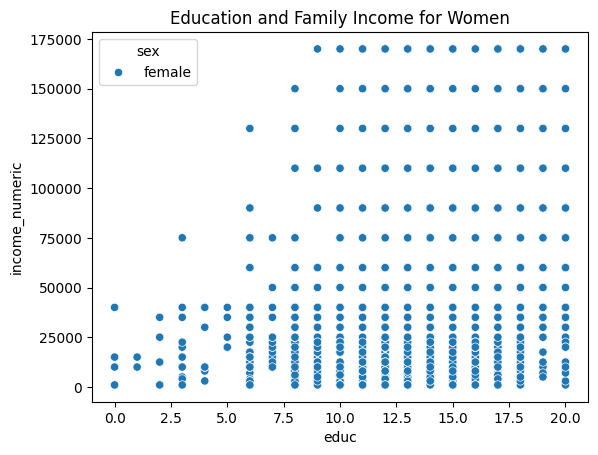

In [67]:
var1 = 'educ' # A numeric variable
var2 = 'income_numeric' # Another numeric

sns.scatterplot(data=female_df, x=var1, y=var2, hue=cat1).set(title='Education and Family Income for Women')
plt.show() # Our initial plot
# this plot shows the important of education on family income for women

The above scatterplot shows a relationship between female education and family income.

[Text(0.5, 1.0, 'Grouped KDE Plot')]

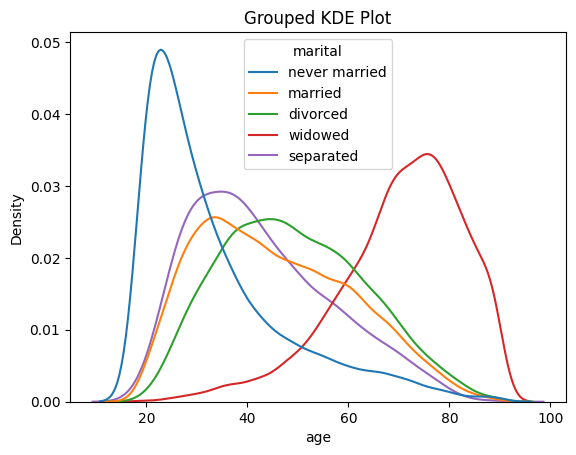

In [68]:
conditioning = 'marital'
var = 'age'
sns.kdeplot( data=female_df, x=var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot')

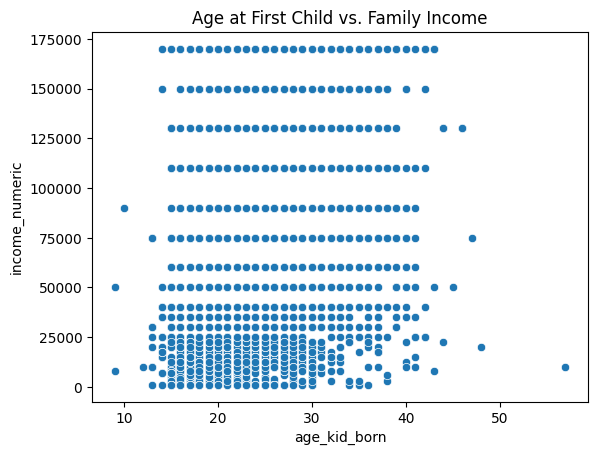

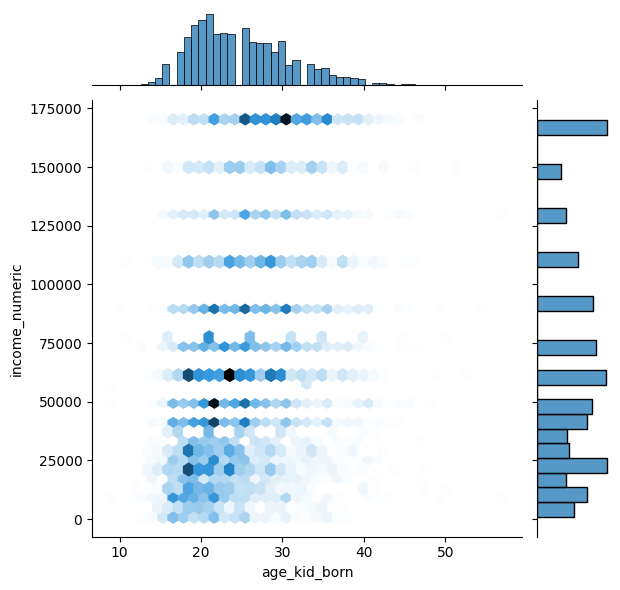

In [69]:
var1 = 'age_kid_born' # A numeric variable
var2 = 'income_numeric' # Another numeric

sns.scatterplot(data=female_df, x=var1, y=var2).set(title='Age at First Child vs. Family Income')
plt.show() # Our initial plot
sns.jointplot(data=new_df, x=var1, y=var2, kind='hex') # to show us where most of the data are

From the above plots, we see that many of the data points are where the mother was relatively younger and the family income is lower. The data slightly moves right and up to indicate that delaying childrearing slightly can increase family income.

[Text(0.5, 1.0, 'Frequency of Two-Income Households Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Households with 2 Earners')]

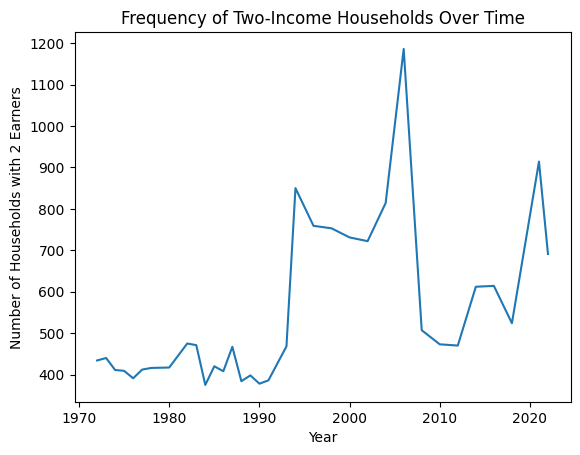

In [70]:
married_dualincome = new_df[(new_df['marital'] == "married") & (new_df['earnrs'] == 2)]

avg_dualincome_per_year = married_dualincome.groupby(['year'])['earnrs'].count().reset_index()

fig = sns.lineplot(data = avg_dualincome_per_year, x = 'year', y = 'earnrs')
fig.set(title="Frequency of Two-Income Households Over Time",
        xlabel='Year', ylabel='Number of Households with 2 Earners')

The above graph highlights historical trends in household earners. Before 1990, very few households had 2 earners. However, there was a spike in the 1990s and into the 2000s.

Writeup of the Overall Findings

Using the GSS data, I explored gender gaps in career outcomes, income, and labor force participation. I looked at trends over time and explored differences using certain categories.
In the first section, we see that men achieve higher levels of education and occupational prestige on average. When I broke up the data into different periods (before 1990, 1990-2010, and after 2010), we saw that the education gap is narrowing and is almost nonexistent. This can be seen on the line graph comparing male and female education over time.

Comparing categorical variables gender and work status during different periods, we see that women are catching up to men in full-time work. However, women are still significantly more likely to work part-time and keep house than men across both periods. These findings are consistent with societal norms and trends.

By splitting up the data by gender, by age at first child, by marriage status, and by age (peak earnings years in a typical career), we gained some valuable insight. Both women and men who have children before the age of 25 suffer an income penalty; however, the penalty is much larger for mothers than for fathers. This finding can be seen in the joint boxplot. Married women have higher family incomes than unmarried women, regardless of age. Married women also work fewer hours on average than single women, which aligns with the previous findings and expectations of the labor division in marriages. Conversely, married men log more hours working than single men.

Married women also tend to achieve higher occupation prestige than single women. The same is true for men. On the grouped kernel density plot, we can see that women are more likely to work part-time (20 hours) than men, and men are more likely to work over 40 hours a week than women.

From the final visualizations, we see that education is positively related to women's family income, underscoring education's importance. We also see that families who delay childrearing to slightly later in life have higher family incomes on average. Finally, we see that dual-income households where both spouses are earners have become more common over time. Overall, the gender career outcome gaps are narrowing, and we gained some valuable insight into key influential factors like education and age at first child.
